In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder,StandardScaler
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE



In [11]:

haberman = pd.read_csv('haberman.csv')
haberman.columns = ['Age','Year','Node','Survival']

haberman.head()

,Age,Year,Node,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [12]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Age       305 non-null    int64
 1   Year      305 non-null    int64
 2   Node      305 non-null    int64
 3   Survival  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [13]:
haberman.isnull().sum()

Age         0
Year        0
Node        0
Survival    0
dtype: int64

In [14]:
haberman.corr()

,Age,Year,Node,Survival
Age,1.000000,0.092623,-0.066548,0.064351
Year,0.092623,1.000000,-0.003277,-0.004076
Node,-0.066548,-0.003277,1.000000,0.286191
Survival,0.064351,-0.004076,0.286191,1.000000


In [15]:
haberman['Survival'].value_counts()

Survival
1    224
2     81
Name: count, dtype: int64

In [16]:
X = haberman.drop('Survival',axis=1)
Y = haberman['Survival']

print(f'Shape of X index 0 : {X.shape[0]}')
print(f'Shape of X index 1 : {X.shape[1]}')
print(f'Shape of Y : {Y.shape[0]}')


Shape of X index 0 : 305
Shape of X index 1 : 3
Shape of Y : 305


In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0,stratify=Y)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(244, 3) (61, 3) (244,) (61,)


In [18]:


forest = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',        
    max_depth=None,           
    min_samples_split=2,      
    min_samples_leaf=1,        
    random_state=0,           
    n_jobs=-1                  
)

forest.fit(X_train, Y_train)

X_train_pred = forest.predict(X_train)
X_test_pred = forest.predict(X_test)

train_accuracy = accuracy_score(Y_train, X_train_pred)
test_accuracy = accuracy_score(Y_test, X_test_pred)



print(f"Train Accuracy: {train_accuracy:}")
print(f"Test Accuracy: {test_accuracy:}")
print('-'*20)

    



Train Accuracy: 0.9795081967213115
Test Accuracy: 0.6557377049180327
--------------------


In [19]:

print("Classification Report - Training Set:")
print(classification_report(Y_train, X_train_pred,target_names=['Alive','Dead']))

print("Classification Report - Testing Set:")
print(classification_report(Y_test, X_test_pred,target_names=['Alive','Dead']))


Classification Report - Training Set:
              precision    recall  f1-score   support

       Alive       0.98      0.99      0.99       179
        Dead       0.98      0.94      0.96        65

    accuracy                           0.98       244
   macro avg       0.98      0.97      0.97       244
weighted avg       0.98      0.98      0.98       244

Classification Report - Testing Set:
              precision    recall  f1-score   support

       Alive       0.77      0.76      0.76        45
        Dead       0.35      0.38      0.36        16

    accuracy                           0.66        61
   macro avg       0.56      0.57      0.56        61
weighted avg       0.66      0.66      0.66        61



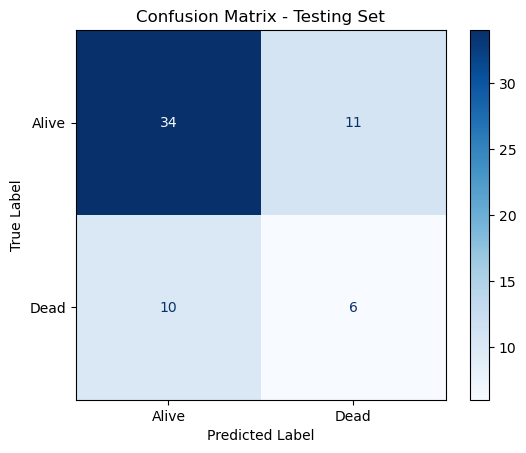

In [20]:

conf_mat = confusion_matrix(Y_test, X_test_pred)
Matrix = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['Alive','Dead'])
Matrix.plot(cmap=plt.cm.Blues, values_format='d')  
plt.title("Confusion Matrix - Testing Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [21]:

param = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None,2,4,6,8],
    'min_samples_split': [2,5,10,15,17],
    'min_samples_leaf': [1,2,4,8],
    'criterion': ['gini', 'entropy']
}


grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=0),
    param_grid=param,
    cv=2,                       
    scoring='accuracy',
    n_jobs=-1,                                   
)


grid_search.fit(X_train, Y_train)


print(f"Best Parameters from GridSearchCV: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")


best_forest = grid_search.best_estimator_

X_train_pred_best = best_forest.predict(X_train)
train_accuracy_best = accuracy_score(Y_train, X_train_pred_best)
print(f"Test Accuracy with Best Parameters: {train_accuracy_best:.4f}")

X_test_pred_best = best_forest.predict(X_test)
test_accuracy_best = accuracy_score(Y_test, X_test_pred_best)
print(f"Test Accuracy with Best Parameters: {test_accuracy_best:.4f}")


c:\Users\Asus\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters from GridSearchCV: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.7418
Test Accuracy with Best Parameters: 0.7336
Test Accuracy with Best Parameters: 0.7377


In [22]:

print("Classification Report - Training Set (Best Estimator):")
print(classification_report(Y_train, X_train_pred_best, target_names=['Alive','Dead']))

print("Classification Report - Testing Set (Best Estimator):")
print(classification_report(Y_test, X_test_pred_best, target_names=['Alive','Dead']))

Classification Report - Training Set (Best Estimator):
              precision    recall  f1-score   support

       Alive       0.73      1.00      0.85       179
        Dead       0.00      0.00      0.00        65

    accuracy                           0.73       244
   macro avg       0.37      0.50      0.42       244
weighted avg       0.54      0.73      0.62       244

Classification Report - Testing Set (Best Estimator):
              precision    recall  f1-score   support

       Alive       0.74      1.00      0.85        45
        Dead       0.00      0.00      0.00        16

    accuracy                           0.74        61
   macro avg       0.37      0.50      0.42        61
weighted avg       0.54      0.74      0.63        61



c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\anaconda3\Lib\site-packages\s

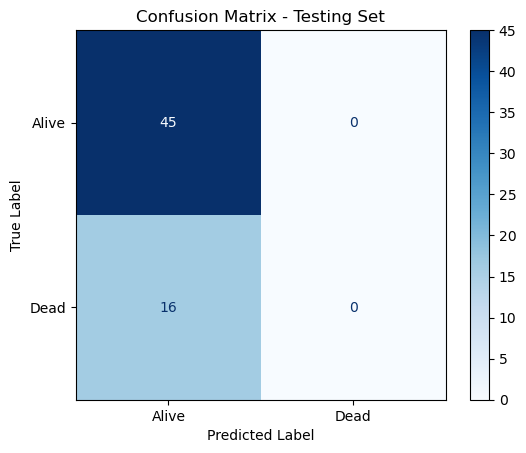

In [23]:

conf_mat = confusion_matrix(Y_test, X_test_pred_best)
Matrix = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['Alive','Dead'])
Matrix.plot(cmap=plt.cm.Blues, values_format='d')  
plt.title("Confusion Matrix - Testing Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [24]:

smote = SMOTE(random_state=0)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

print("Class distribution after SMOTE:")
print(Y_train_smote.value_counts())


best_forest.fit(X_train_smote, Y_train_smote)

X_test_pred = best_forest.predict(X_test)

accuracy = accuracy_score(Y_test, X_test_pred)
classification_report_result = classification_report(Y_test, X_test_pred)
confusion_matrix_result = confusion_matrix(Y_test, X_test_pred)

print("Accuracy on Test Data:", accuracy)
print("Classification Report:", classification_report_result)
print("Confusion Matrix:", confusion_matrix_result)


Class distribution after SMOTE:
Survival
1    179
2    179
Name: count, dtype: int64
Accuracy on Test Data: 0.639344262295082
Classification Report:               precision    recall  f1-score   support

           1       0.79      0.69      0.74        45
           2       0.36      0.50      0.42        16

    accuracy                           0.64        61
   macro avg       0.58      0.59      0.58        61
weighted avg       0.68      0.64      0.65        61

Confusion Matrix: [[31 14]
 [ 8  8]]
